In [2]:
import _utils.helper as hlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## import data

In [3]:
df_reviews = pd.read_json('dataset/IMDB_reviews.json', lines=True)
df_moives = pd.read_json('dataset/IMDB_movie_details.json', lines=True)

In [4]:
display(df_reviews)
display(df_moives)

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
573908,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573909,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573910,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...
...,...,...,...,...,...,...,...
1567,tt0289879,Evan Treborn grows up in a small town with his...,1h 53min,"[Sci-Fi, Thriller]",7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher..."
1568,tt1723811,Brandon is a 30-something man living in New Yo...,1h 41min,[Drama],7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ..."
1569,tt5013056,Evacuation of Allied soldiers from the British...,1h 46min,"[Action, Drama, History]",8.1,2017-07-21,The film alternates between three different pe...
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana B...",1h 33min,"[Comedy, Drama]",5.3,1992-02-21,


## analyze

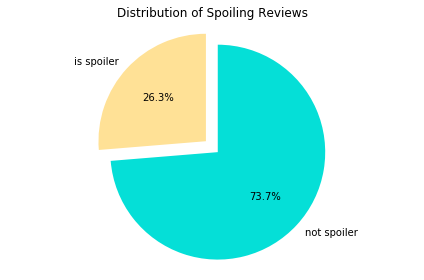

,is_spoiler,count
0,true,150924
1,false,422989


In [5]:
false , true = df_reviews.is_spoiler.value_counts()

labels = ['is spoiler', 'not spoiler']
values = [true, false]

# Create a list of colors (from iWantHue)
colors = ["#ffe196", "#05dfd7"]

tmpdf = pd.DataFrame({'is_spoiler':['true', 'false'], 'count': values})
tmpdf.set_index('is_spoiler')

plt.pie(
    # using data total)arrests
    tmpdf['count'],
    # with the labels being officer names
    labels=labels,
    # with colors
    colors=colors,
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%');
plt.title('Distribution of Spoiling Reviews')   
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

tmpdf

## check for null values

In [6]:
df_reviews.isnull().sum()

review_date       0
movie_id          0
user_id           0
is_spoiler        0
review_text       0
rating            0
review_summary    0
dtype: int64

In [7]:
df_moives.isnull().sum()

movie_id         0
plot_summary     0
duration         0
genre            0
rating           0
release_date     0
plot_synopsis    0
dtype: int64

## add post id & convert true false values to 1 and 0

In [8]:
df_reviews_merged = pd.merge(df_reviews,df_moives.drop('rating', axis=1),on='movie_id')
review_ids = np.arange(1000000, df_reviews_merged.review_text.count()+1000000)
df_reviews_merged['post_id'] = review_ids
df_reviews_merged['is_spoiler'] = df_reviews_merged.is_spoiler.apply(int)
df_reviews_merged

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,plot_summary,duration,genre,release_date,plot_synopsis,post_id
0,10 February 2006,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",1000000
1,6 September 2000,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",1000001
2,3 August 2001,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",1000002
3,1 September 2002,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",1000003
4,20 May 2004,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",1000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,8 August 1999,tt0139239,ur0100166,0,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",1999-04-09,"The film is told out of chronological format, ...",1573901
573902,31 July 1999,tt0139239,ur0021767,0,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",1999-04-09,"The film is told out of chronological format, ...",1573902
573903,20 July 1999,tt0139239,ur0392750,0,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",1999-04-09,"The film is told out of chronological format, ...",1573903
573904,11 June 1999,tt0139239,ur0349105,0,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",1999-04-09,"The film is told out of chronological format, ...",1573904


## get all genres

In [9]:
genre_names = np.unique(np.array(' '.join(df_moives.genre.str.join(' ')).split()))
print(genre_names)
print('count:', len(genre_names))

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']
count: 21


## add categorical genre & drop genre column

In [10]:
# add all genres as new columns with 0 value
for genre in genre_names:
    df_reviews_merged[genre.lower()] = 0

# fill existed genres with 1 
for index, row in df_reviews_merged.iterrows():
    genres = row['genre']
    for g in genre_names:
        df_reviews_merged.at[index, g.lower()] = int(g in genres)   

# drop genre column         
df_moives.drop('genre', axis=1)        

# show data
genre_names_str = [str(i).lower() for i in genre_names]
df_reviews_merged

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,plot_summary,duration,genre,...,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,10 February 2006,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",...,0,0,0,0,0,0,0,0,0,0
1,6 September 2000,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",...,0,0,0,0,0,0,0,0,0,0
2,3 August 2001,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",...,0,0,0,0,0,0,0,0,0,0
3,1 September 2002,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",...,0,0,0,0,0,0,0,0,0,0
4,20 May 2004,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,8 August 1999,tt0139239,ur0100166,0,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",...,0,0,0,0,0,0,0,0,0,0
573902,31 July 1999,tt0139239,ur0021767,0,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",...,0,0,0,0,0,0,0,0,0,0
573903,20 July 1999,tt0139239,ur0392750,0,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",...,0,0,0,0,0,0,0,0,0,0
573904,11 June 1999,tt0139239,ur0349105,0,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",...,0,0,0,0,0,0,0,0,0,0


In [11]:
genre_names_str = [str(i).lower() for i in genre_names]
df_reviews_merged[genre_names_str[3:10]]

,biography,comedy,crime,drama,family,fantasy,film-noir
0,0,0,1,1,0,0,0
1,0,0,1,1,0,0,0
2,0,0,1,1,0,0,0
3,0,0,1,1,0,0,0
4,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...
573901,0,1,1,0,0,0,0
573902,0,1,1,0,0,0,0
573903,0,1,1,0,0,0,0
573904,0,1,1,0,0,0,0


## save final imported data

In [15]:
import os 
save_path = './_imported_data'
if(not os.path.exists(save_path)):
    os.makedirs(save_path)
hlp.save(df_reviews_merged, os.path.join(save_path, 'imported_data'))

## ---------end---------

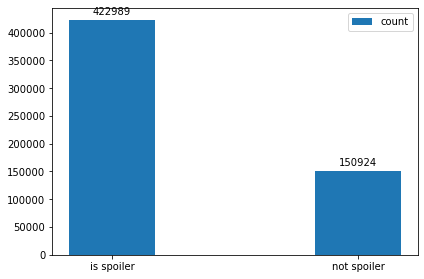

In [5]:
false , true = df_reviews.is_spoiler.value_counts()

labels = ['is spoiler', 'not spoiler']
values = [false, true]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
result = ax.bar(x, values, width, label='count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

hlp.autolabel(result, ax)
fig.tight_layout()
plt.show()